## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


In [1]:
# Import Packages
import glob  # OS dependencies to get file system details

import cv2
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def show_images(images, gray=None, divider = 2):
    """
    This is an utility function to show multiple images with different colour maps

    :param images - An images list
    :param gray - A flag to set default value for matplotlib imshow colour map. If the image
                  shape is 2( i.e binary image) then cmap value will be "gray"
    :return: Nothing
    """
    rows = (len(images)+1)//divider
    plt.figure(figsize=(16, 16))
    for idx, img in enumerate(images):
        plt.subplot(rows, divider, idx+1)
        # if the image is binary then it'll be printed as grayscale, otherwise colour map
        # will be ignored
        plt.imshow(img, cmap="gray" if len(img.shape) == 2 else gray)
        plt.xticks([])
        plt.yticks([])

    plt.show()

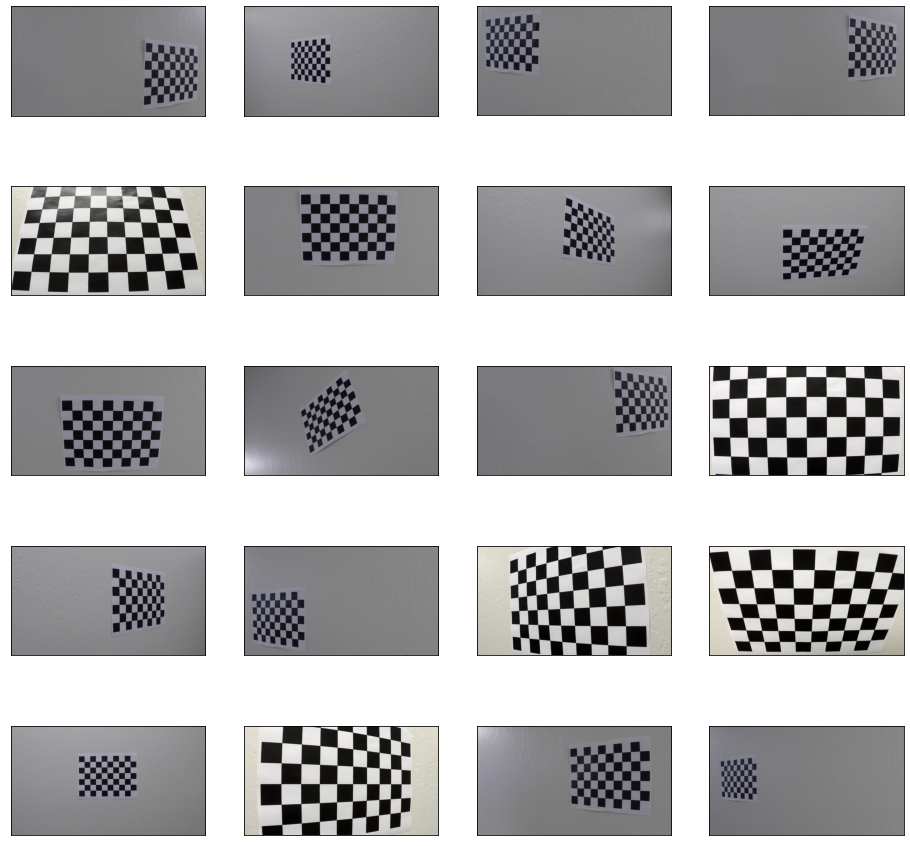

In [3]:
# Loading test images from test_image directory
camera_cal_imgs = [plt.imread(path) for path in glob.glob("camera_cal/*")]
# Visualize calibration images
show_images(camera_cal_imgs, divider=4)

In [4]:
def grayscale(img, opencv_read=False):
    """

    :param img:
    :param opencv_read:
    :return:
    """
    if opencv_read:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


In [5]:
# prepare objects points
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and iamg points from all the images
objpoints = []
imgpoints = []

In [6]:
def find_and_draw_chessboard(img, idx,axs, pattern_size= (9,6)):
    gray = grayscale(img)

    # find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    # if found, add object points, image points
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        # draw and display the corners
        cv2.drawChessboardCorners(img, pattern_size, corners, ret)
        
        axs[idx].axis('off')
        axs[idx].imshow(img)

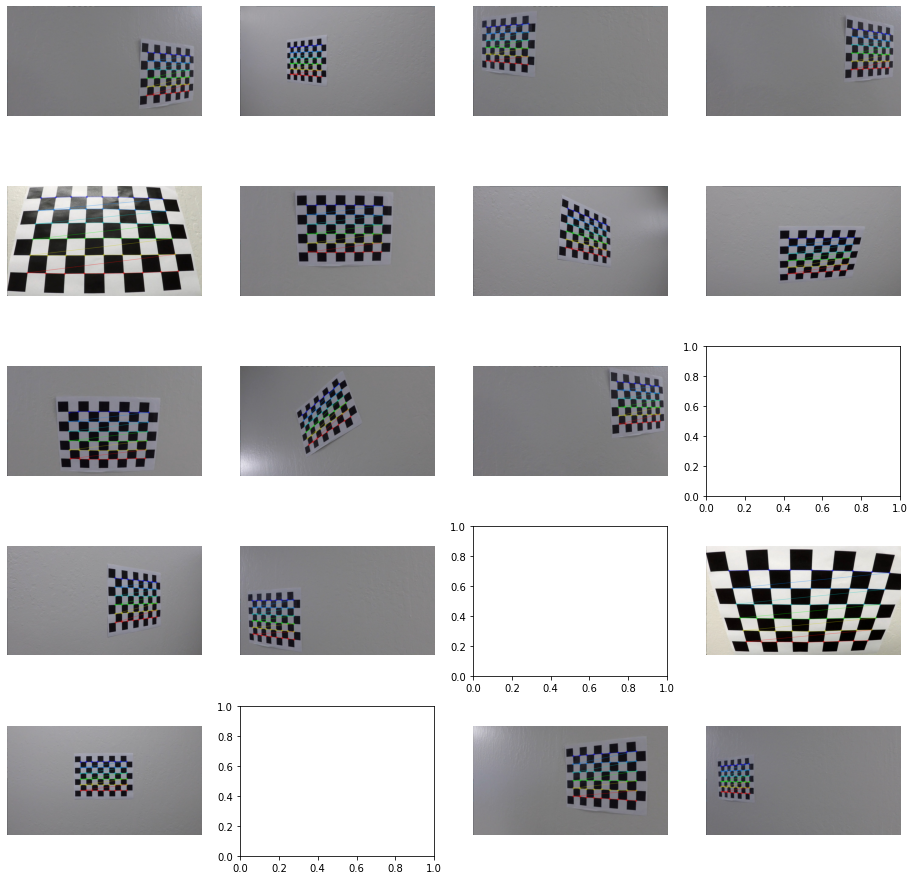

In [7]:
# draw subplots dynamically
fig, axs = plt.subplots(5,4, figsize=(16, 16))
axs = axs.ravel()

for idx, img in enumerate(camera_cal_imgs):
    find_and_draw_chessboard(img,idx,axs)